Quiz Title: Bitcoin Price Forecasting with ARIMA

Quiz Description:

First collect bitcoin price from 2022-01-01T00:00:00Z till 2022-12-01T23:59:59Z within 1 hour interval you can use wallex or nobitex or coinbase.com or ...

Then Your task is to use the ARIMA (AutoRegressive Integrated Moving Average) model to forecast the price of Bitcoin for a future period accoarding to data that you collected.

Question 1: Perform a visual analysis of the dataset. Plot the time series of Bitcoin prices over the 12 months.

Question 2: Before applying ARIMA, what steps would you take to make the time series stationary? Do them all

Question 3: Apply the ARIMA model to the dataset. Choose appropriate values for p, d, and q.

Question 4: Forecast the Bitcoin price for the next 3 hours using your ARIMA model.

Question 5: Evaluate the performance of your ARIMA model. Calculate and explain appropriate evaluation metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for your forecast.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
import requests
import datetime

In [5]:
# raw_df = yf.download('BTC-USD', start='2022-01-01', end= '2022-12-01', interval= '1h')

In [6]:
# df = raw_df.asfreq('h')

In [7]:
# print(raw_df.shape)
# print(df.shape)

In [8]:
symbol = 'BTCUSDT'
from_timestamp = int(datetime.datetime(year=2022, month=1, day=1).timestamp())
to_timestamp = int(datetime.datetime(2022,12,31).timestamp())

wallex = f'https://api.wallex.ir/v1/udf/history?symbol={symbol}&resolution=60&from={from_timestamp}&to={to_timestamp}'

r= requests.get(wallex)

In [9]:
data = r.json()
df = pd.DataFrame({"timestamp":data['t'],"open":data['o'],"close":data['c'],"low":data['l'],"high":data['h']}
                  # ,dtype='float32'
                 )
df.to_csv('bitcoin_prices.csv')

In [10]:
# Load the dataset
df = pd.read_csv('./bitcoin_prices.csv')

df['datetime'] = df['timestamp'].map(lambda x: datetime.datetime.fromtimestamp(x))
# Convert timestamp column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

df['mean_price'] = df.apply(lambda x: (x.open + x.close+x.low+x.high)/4,axis=1)
df['price'] = df.apply(lambda x: (x.close if x.open > x.close else x.open),axis=1)
# # Set timestamp column as index
df.set_index('datetime', inplace=True)

In [11]:
df.head()

,Unnamed: 0,timestamp,open,close,low,high,mean_price,price
datetime,,,,,,,,
2022-01-01 00:30:00,0,1640984400,46850.00,46850.00,46850.00,46850.00,46850.0000,46850.00
2022-01-01 01:30:00,1,1640988000,47265.70,46657.45,46400.00,47265.70,46897.2125,46657.45
2022-01-01 02:30:00,2,1640991600,46100.00,46000.00,46000.00,46176.79,46069.1975,46000.00
2022-01-01 03:30:00,3,1640995200,45900.00,45800.11,45800.11,45900.00,45850.0550,45800.11
2022-01-01 04:30:00,4,1640998800,46124.85,46146.43,45946.28,46155.71,46093.3175,46124.85


In [12]:
df.isna().sum()

Unnamed: 0    0
timestamp     0
open          0
close         0
low           0
high          0
mean_price    0
price         0
dtype: int64

Question 1: Perform a visual analysis of the dataset. Plot the time series of Bitcoin prices over the 12 months.


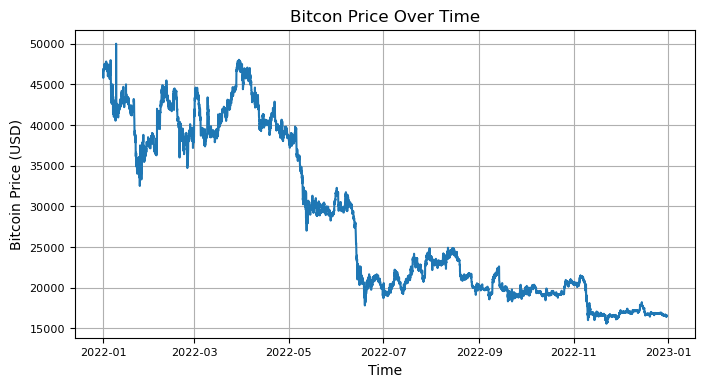

In [13]:
plt.figure(figsize=(8,4))
plt.plot(df.close)
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Bitcon Price Over Time')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(linestyle='-')

Question 2: Before applying ARIMA, what steps would you take to make the time series stationary? Do them all

In [15]:
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA

Text(0.5, 1.0, 'ACF for prices')

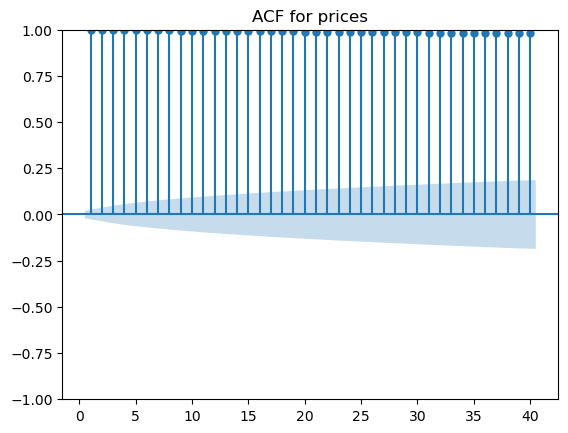

In [16]:
sgt.plot_acf(df.close, zero = False, lags=40)
plt.title('ACF for prices', size=12)

Text(0.5, 1.0, 'PACF for prices, size=12')

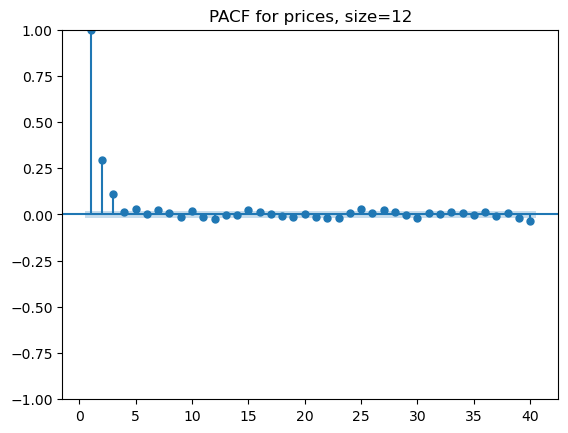

In [17]:
sgt.plot_pacf(df.close, lags=40, zero=False, method=('ols'))
plt.title('PACF for prices, size=12')

In [18]:
df2 = df.resample('H').mean()

In [19]:
model_ar_1 = ARIMA(df2.close, order=(3,0,0))

In [20]:
results_ar_1 = model_ar_1.fit()

In [21]:
results_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 8736
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -61633.751
Date:                Mon, 09 Oct 2023   AIC                         123277.502
Time:                        22:40:46   BIC                         123312.878
Sample:                    01-01-2022   HQIC                        123289.557
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.813e+04      1.401   2.01e+04      0.000    2.81e+04    2.81e+04
ar.L1          0.6694      0.003    260.004      0.000       0.664       0.674
ar.L2          0.2330      0.004     62.444      0.000       0.226       0.240
ar.L3          0.0970      0.004     21.841      0.000       0.088       0.106
sigma2      1.003e+05    306.427    327.180      0.000    9.97e+04    1.01e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2071338.51
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        78.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.23e+18. Standard errors may be unstable.
"""

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
import statsmodels.tsa.stattools as sts

In [24]:
sts.adfuller(df.close)

(-1.5584865691748953,
 0.5044063619641599,
 26,
 8564,
 {'1%': -3.4311138091018725,
  '5%': -2.86187755195482,
  '10%': -2.5669496739842286},
 122746.12482559744)

In [25]:
df['dif'] = df.close.diff()

In [26]:
df.head()

,Unnamed: 0,timestamp,open,close,low,high,mean_price,price,dif
datetime,,,,,,,,,
2022-01-01 00:30:00,0,1640984400,46850.00,46850.00,46850.00,46850.00,46850.0000,46850.00,NaN
2022-01-01 01:30:00,1,1640988000,47265.70,46657.45,46400.00,47265.70,46897.2125,46657.45,-192.55
2022-01-01 02:30:00,2,1640991600,46100.00,46000.00,46000.00,46176.79,46069.1975,46000.00,-657.45
2022-01-01 03:30:00,3,1640995200,45900.00,45800.11,45800.11,45900.00,45850.0550,45800.11,-199.89
2022-01-01 04:30:00,4,1640998800,46124.85,46146.43,45946.28,46155.71,46093.3175,46124.85,346.32


In [27]:
df = df[1:]

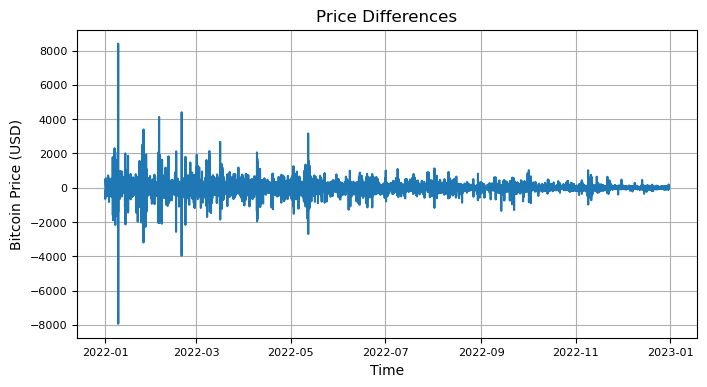

In [28]:
plt.figure(figsize=(8,4))
plt.plot(df.dif)
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Price Differences')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(linestyle='-')

In [29]:
sts.adfuller(df.dif)

(-19.038259507019426,
 0.0,
 25,
 8564,
 {'1%': -3.4311138091018725,
  '5%': -2.86187755195482,
  '10%': -2.5669496739842286},
 122731.25754460794)

Text(0.5, 1.0, 'ACF for the differences')

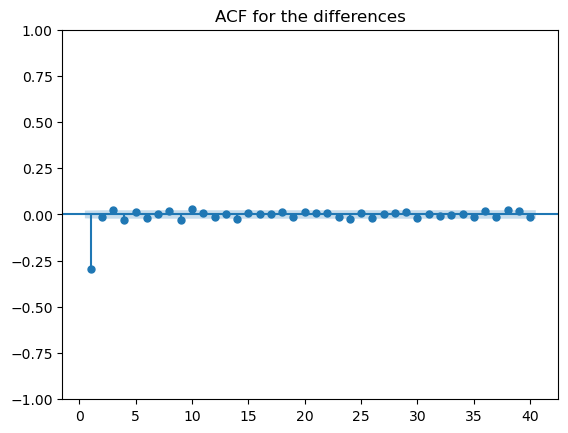

In [30]:
sgt.plot_acf(df.dif, zero = False, lags=40)
plt.title('ACF for the differences', size=12)

Text(0.5, 1.0, 'PACF for differences, size=12')

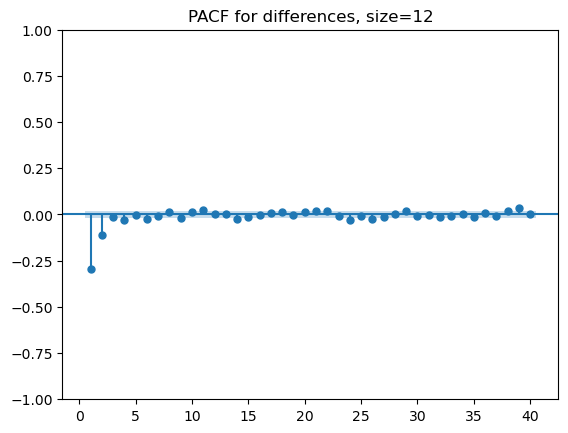

In [31]:
sgt.plot_pacf(df.dif, lags=40, zero=False, method=('ols'))
plt.title('PACF for differences, size=12')

In [32]:
model_ar_2_d_1_ma_1 = ARIMA(df2.close, order=(2,1,1))

In [33]:
results_ar_2_d_1_ma_1 = model_ar_2_d_1_ma_1.fit()

In [34]:
results_ar_2_d_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 8736
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -61619.179
Date:                Mon, 09 Oct 2023   AIC                         123246.358
Time:                        22:42:31   BIC                         123274.658
Sample:                    01-01-2022   HQIC                        123256.002
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0926      0.050      1.862      0.063      -0.005       0.190
ar.L2          0.0286      0.016      1.748      0.080      -0.003       0.061
ma.L1         -0.4212      0.049     -8.546      0.000      -0.518      -0.325
sigma2      9.884e+04    295.384    334.601      0.000    9.83e+04    9.94e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):           2119096.93
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             1.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        79.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
forecast = results_ar_2_d_1_ma_1.forecast(steps=3)
forecast = pd.DataFrame(forecast)

In [36]:
forecast

,predicted_mean
2022-12-31 00:00:00,16573.092018
2022-12-31 01:00:00,16572.922227
2022-12-31 02:00:00,16572.773784


In [38]:
from pmdarima.arima import auto_arima

In [39]:
model_auto = auto_arima(df.close)

In [40]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8590
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -61631.261
Date:                Mon, 09 Oct 2023   AIC                         123274.523
Time:                        23:10:20   BIC                         123316.872
Sample:                             0   HQIC                        123288.967
                               - 8590                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5288      0.005   -285.158      0.000      -1.539      -1.518
ar.L2         -0.9862      0.005   -186.067      0.000      -0.997      -0.976
ma.L1          1.1986      0.006    195.983      0.000       1.187       1.211
ma.L2          0.4864      0.006     80.718      0.000       0.475       0.498
ma.L3         -0.3155      0.004    -70.359      0.000      -0.324      -0.307
sigma2      1.001e+05    389.320    257.015      0.000    9.93e+04    1.01e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1807116.04
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             1.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
auto-atima suggest ARIMA(2,1,3) model and no seasonality

In [ ]:
since ARIMA(2,1,1) has higher LLR therefore still it is the choice

In [131]:
L = len(df)
train = df.close.iloc[:int(0.8*L)]
test = df.close.iloc[int(0.8*L):]

In [ ]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [100]:
train = train.reset_index
test = test.reset_index

In [ ]:
#summary_results = []

#for index, row in test.iterrows():
#    D = len(train) - len(test) + index  
#    model = ARIMA(train.iloc[len(test)+index:len(test)+D], order=(2, 1, 3))
#    result = model.fit()
#    forecast = result.forecast()
#    summary_results.append(forecast)
#
#
#print("Forecasted Values:", summary_results)

In [159]:
summary_results = []

for index, row in test.iterrows():
    D = len(train) - len(test) + index  
    model = ARIMA(train.iloc[len(test)-index:-index-1], order=(2, 1, 1))
    result = model.fit()
    forecast = result.forecast()
    summary_results.append(forecast)


print("Forecasted Values:", summary_results)

In [192]:
model_1 = ARIMA(df2.close[:-1], order=(2,1,1))
results_1 = model_1.fit()
forecast_1 = results_1.forecast(steps=1)

In [181]:
model_2 = ARIMA(df2[:-2].close, order=(2,1,1))
results_2 = model_2.fit()
forecast_2 = results_2.forecast(steps=1)

In [184]:
model_3 = ARIMA(df2[:-3].close, order=(2,1,1))
results_3 = model_3.fit()
forecast_3 = results_3.forecast(steps=1)

In [185]:
model_4 = ARIMA(df2[:-4].close, order=(2,1,1))
results_4 = model_4.fit()
forecast_4 = results_4.forecast(steps=1)

In [186]:
model_5 = ARIMA(df2[:-5].close, order=(2,1,1))
results_5 = model_5.fit()
forecast_5 = results_5.forecast(steps=1)

In [240]:
forecast=[list(forecast_1), list(forecast_2), list(forecast_3), list(forecast_4), list(forecast_5)]

In [241]:
forecast = pd.Series(forecast)
forecast = forecast.apply(lambda x: x[0])
forecast

0    16564.127229
1    16556.689970
2    16553.683664
3    16520.466291
4    16420.876936
dtype: float64

In [242]:
actual = df2.close[-5:]

In [243]:
actual.index = range(0,5)
actual

0    16568.61
1    16568.61
2    16560.22
3    16568.61
4    16577.74
Name: close, dtype: float64

In [244]:
mae = np.mean(np.abs(actual - forecast))
mae

45.58918193440477

In [246]:
rmse = np.sqrt(np.mean((actual - forecast) ** 2))
rmse

73.65968180402997